In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import librosa.display


In [17]:
music_data = pd.read_csv('/Users/cui/Desktop/Data/features_30_sec.csv') 
music_data_s = pd.read_csv('/Users/cui/Desktop/Data/features_3_sec.csv') 

music_data.head(5)
music_data_s.head(5)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
music_data['label'].value_counts()

music_data_s['label'].value_counts()



label
blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

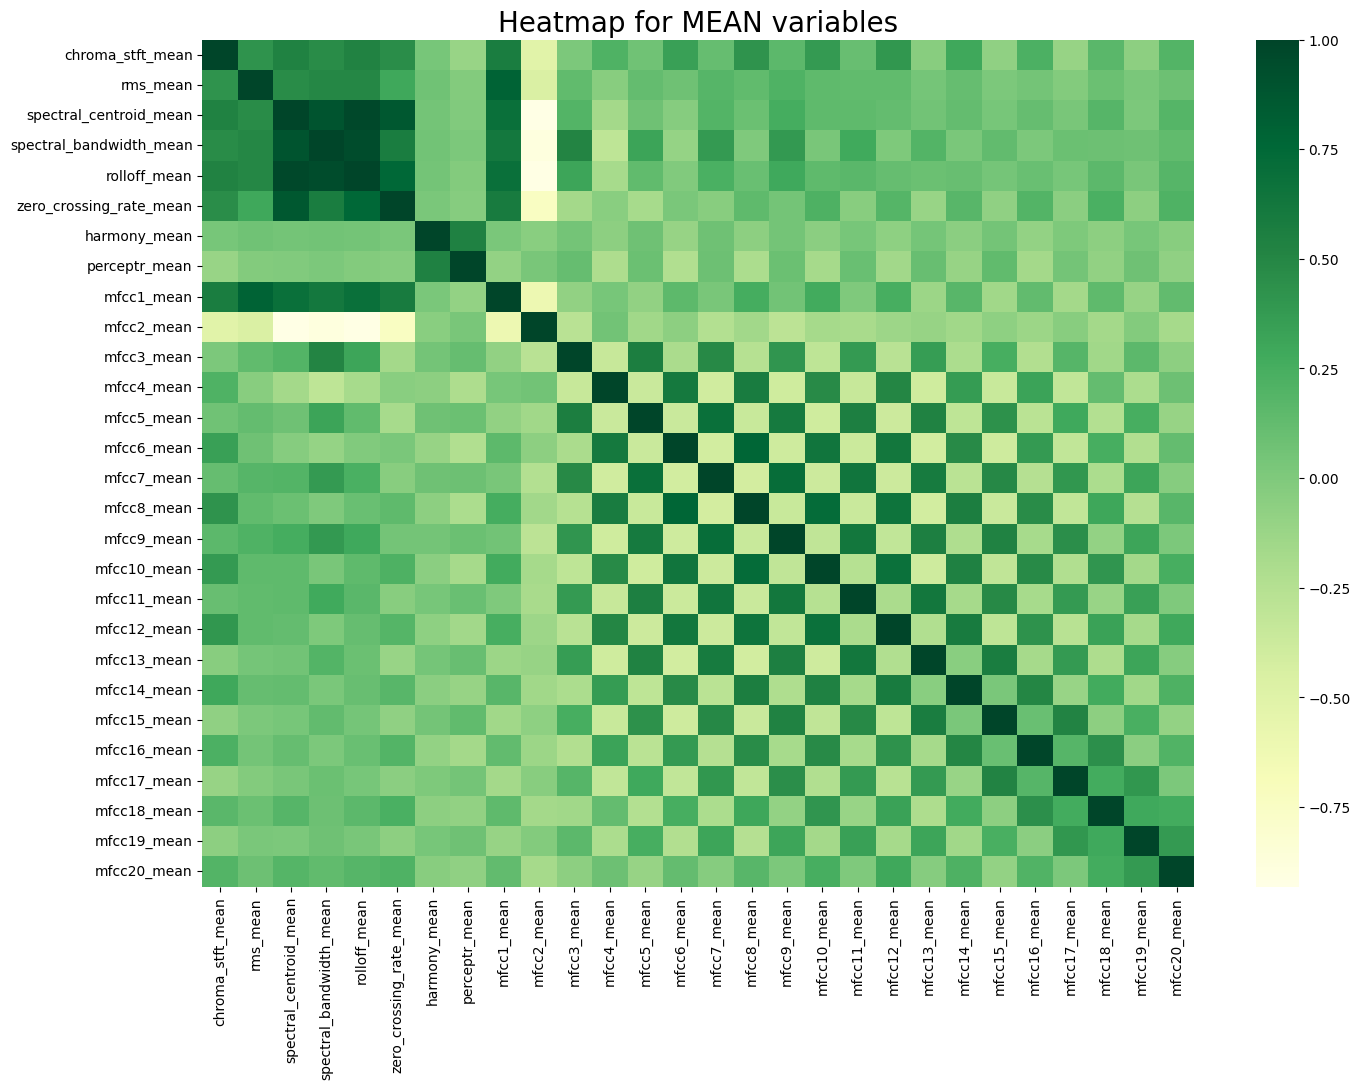

In [25]:
import numpy as np 
import seaborn as sns 

# Computing the Correlation Matrix 
spike_cols = [col for col in music_data_s.columns if 'mean' in col] 

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(16, 11)); 

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(music_data_s[spike_cols].corr(), cmap='YlGn') 

plt.title('Heatmap for MEAN variables', fontsize = 20) 
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


In [26]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
music_data_s['label'] = label_encoder.fit_transform(music_data_s['label'])


In [27]:
X = music_data_s.drop(['label','filename'],axis=1) 
y = music_data_s['label']


In [28]:
cols = X.columns 
minmax = preprocessing.MinMaxScaler() 
np_scaled = minmax.fit_transform(X) 

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)


In [29]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
													test_size=0.3, 
													random_state=111) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6993, 58), (2997, 58), (6993,), (2997,))

In [30]:
!python -c "import platform; print(platform.architecture())"

('64bit', '')


In [31]:
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
import catboost as cb 
from xgboost import XGBClassifier 

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0) 
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=1000, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass') 
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) 

KNeighborsClassifier Accuracy: 0.89


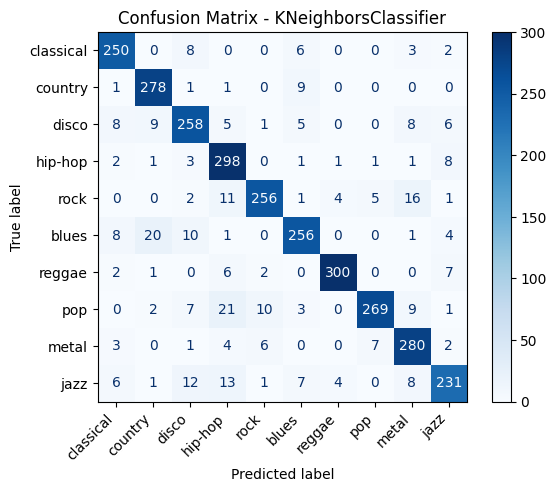

DecisionTreeClassifier Accuracy: 0.66


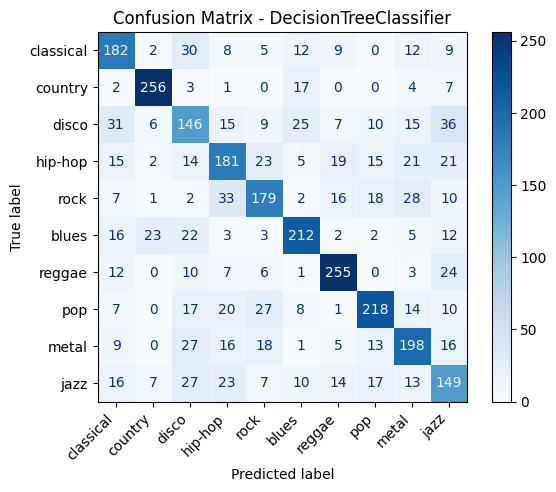

RandomForestClassifier Accuracy: 0.81


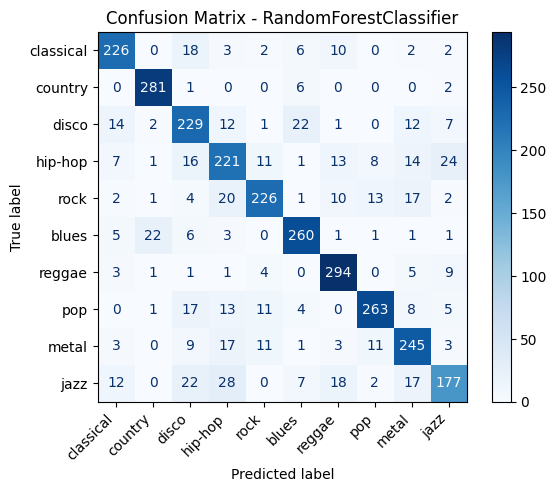

LogisticRegression Accuracy: 0.69


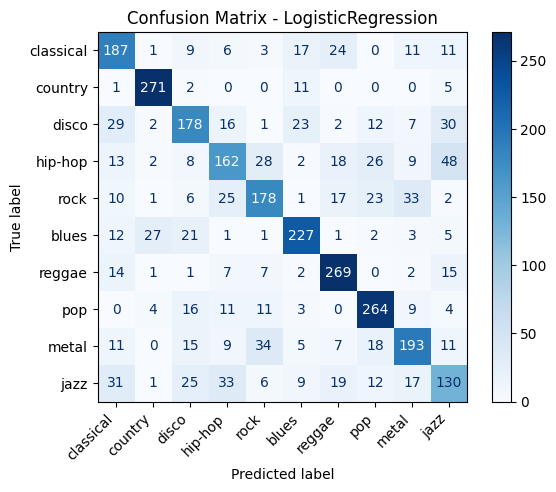

CatBoostClassifier Accuracy: 0.91


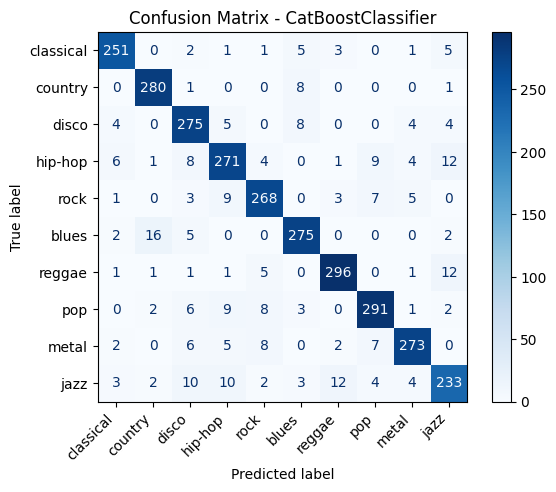

XGBClassifier Accuracy: 0.91


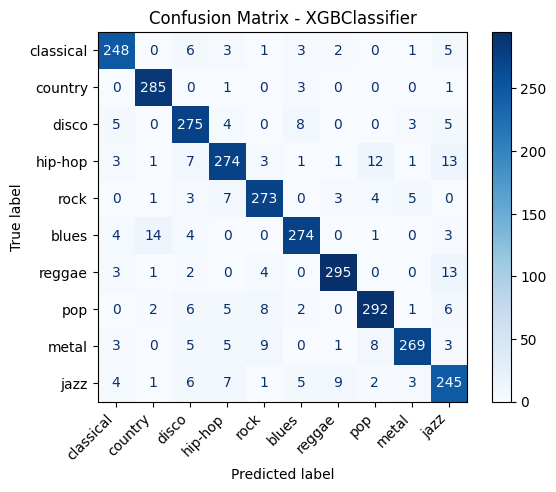

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Genre mapping
genre_mapping = {
    0: "classical",
    1: "country",
    2: "disco",
    3: "hip-hop",
    4: "rock",
    5: "blues",
    6: "reggae",
    7: "pop",
    8: "metal",
    9: "jazz"
}

# Reverse mapping for string labels (if necessary)
reverse_mapping = {v: k for k, v in genre_mapping.items()}

# Fit classifiers, make predictions, and display confusion matrices
for clf in (knn, dtc, rf, lr, cbc, xgb):
    clf.fit(X_train, y_train)  # Train the classifier
    preds = clf.predict(X_test)  # Make predictions on test data
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, preds)
    print(f"{clf.__class__.__name__} Accuracy: {accuracy:.2f}")
    
    # Ensure y_test and preds are integers for confusion matrix computation
    # Ensure y_test is a NumPy array for safe positional indexing
    if isinstance(y_test, pd.Series):
        y_test = y_test.values  # Convert to NumPy array if it's a pandas Series

    # Check the first element type to decide mapping
    if isinstance(y_test[0], str):
        y_test_mapped = np.array([reverse_mapping[label] for label in y_test])
        preds_mapped = np.array([reverse_mapping[label] for label in preds])
    else:
        y_test_mapped = y_test
        preds_mapped = preds

        # Define class names using the genre mapping
        class_names = [genre_mapping[i] for i in np.unique(y_test_mapped)]

        # Compute the confusion matrix
        cm = confusion_matrix(y_test_mapped, preds_mapped)

        # Display confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap=plt.cm.Blues)
        plt.xticks(rotation=45, ha="right")
        plt.title(f"Confusion Matrix - {clf.__class__.__name__}")
        plt.show()


In [33]:
import tensorflow.keras as keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import *

model = Sequential() 

model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax')) 
model.summary()


/opt/anaconda3/envs/sb/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        15,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# compile the model 
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, 
			loss="sparse_categorical_crossentropy", 
			metrics=["accuracy"]) 

hist = model.fit(X_train, y_train, 
				validation_data = (X_test,y_test), 
				epochs = 100, 
				batch_size = 32)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2561 - loss: 2.0837 - val_accuracy: 0.4451 - val_loss: 2.0294
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4774 - loss: 1.4950 - val_accuracy: 0.5839 - val_loss: 1.5180
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5530 - loss: 1.2943 - val_accuracy: 0.6370 - val_loss: 1.1421
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6061 - loss: 1.1530 - val_accuracy: 0.6657 - val_loss: 1.0092
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6251 - loss: 1.0867 - val_accuracy: 0.6977 - val_loss: 0.9430
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.6434 - loss: 1.0305 - val_accuracy: 0.7110 - val_loss: 0.8963
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.6674 - loss: 0.9897 - val_accuracy: 0.7221 - val_loss: 0.8542
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.6729 - loss: 0.9639 - va

In [35]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1) 
print(f"Test accuracy: {test_accuracy}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8818 - loss: 0.3739
Test accuracy: 0.8748748898506165


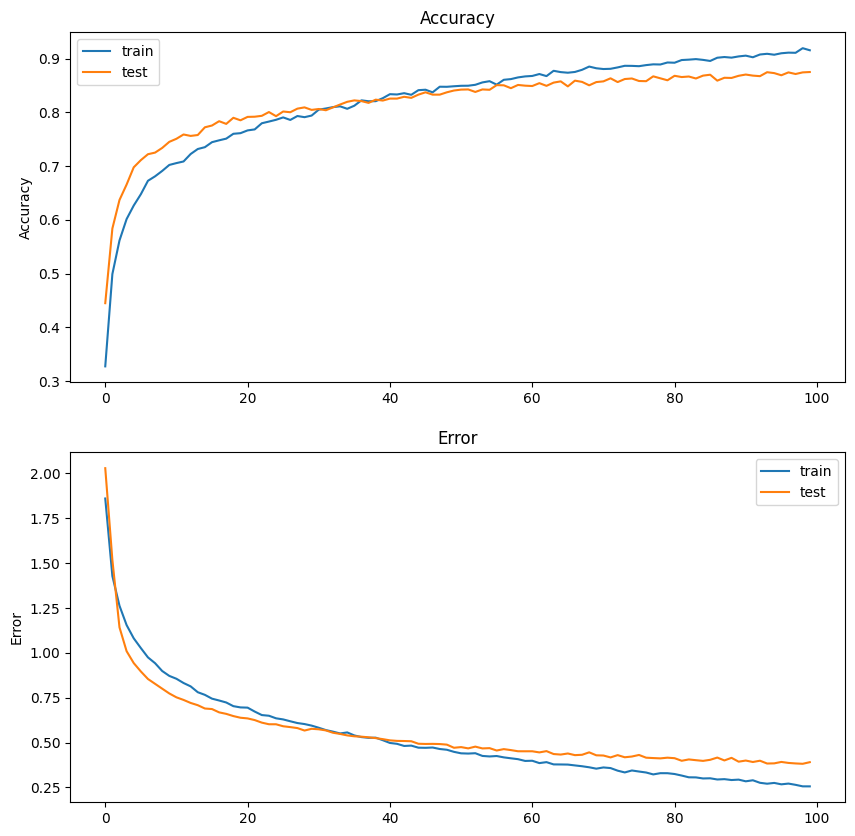

In [36]:
fig, axs = plt.subplots(2,figsize=(10,10)) 

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train") 
axs[0].plot(hist.history["val_accuracy"], label="test")	 
axs[0].set_ylabel("Accuracy") 
axs[0].legend() 
axs[0].set_title("Accuracy") 
	
# Error 
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")	 
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
	
plt.show()
